In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio

from mpl_toolkits.basemap import Basemap, cm

In [2]:
# load in the NPP data

fname = '/Users/sclayton/Documents/MIT_work/ostreo/satellite_data/vgpm.2009289.all.xyz'
result = pd.read_csv(fname, sep = ' ')
print(result.columns)

Index([u'lon', u'lat', u'value', u'(-9999', u'=', u'no', u'data)'], dtype='object')


In [3]:
lon = (result['lon']).values # longitude
lat = (result['lat']).values # latitude
npp = (result['value']).values # npp

# reshape the data to a 2160x4320 grid
ny = 2160
nx = 4320

LON = lon.reshape(ny,nx)
LAT = lat.reshape(ny,nx)
NPP = npp.reshape(ny,nx)



In [5]:
# import location data for cruise track and stations
cfname = '/Volumes/sclayton/kuroshio/AVHRR_9km/xbt_ctd_coords.mat'
coords = sio.loadmat(cfname)

botlat = coords['bot_lat']
botlon = coords['bot_lon']
xbtlon = coords['xbt_lon']
xbtlat = coords['xbt_lat']


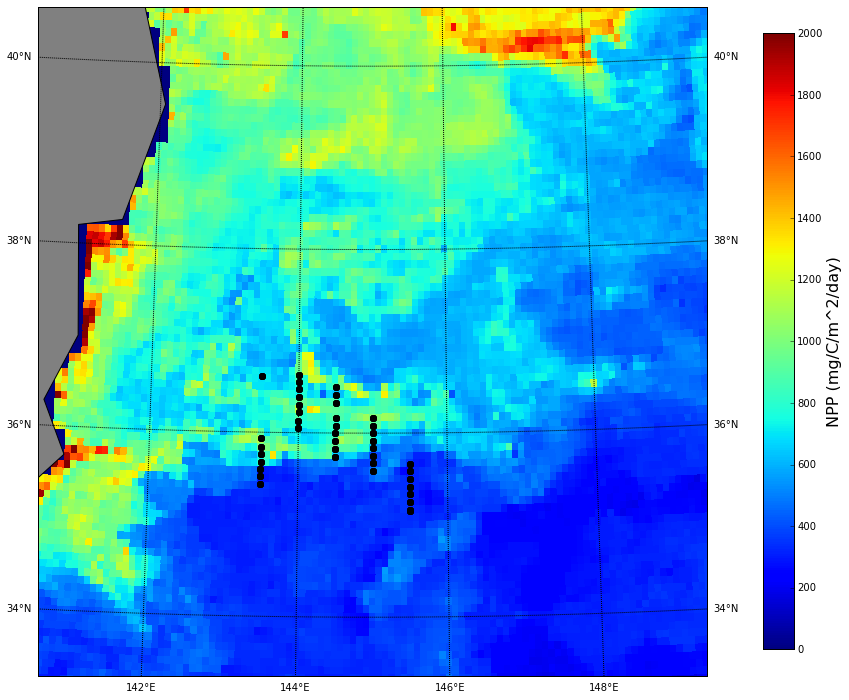

In [7]:
# make a plot of the data

fig1 = plt.figure(1, figsize=(20,12))

m = Basemap(width=800000,height=800000,projection='lcc',
            resolution='c',lat_1=30.,lat_2=50,lat_0=37,lon_0=145.)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

m.pcolormesh(LON,LAT,NPP,shading = 'flat', cmap=plt.cm.jet, latlon=True, vmin= 0, vmax = 2000)
x,y = m(botlon,botlat)
m.plot(x,y,'ko')

m.drawparallels(np.arange(30,50,2),labels=[1,1,0,1])
m.drawmeridians(np.arange(138,153,2),labels=[1,1,0,1])

cb = plt.colorbar(shrink=.92)
cb.set_label(label='NPP (mg/C/m^2/day)',fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()
